<a href="https://colab.research.google.com/github/Chaitanya-Shinde/DeepLearning/blob/main/Back_Propogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Back Propogation in deep learning

Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.
 In this lab, we will create a neural network to implement backpropagation for a XOR problem.


# Objective for this notebook

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# defining inputs and expected outputs for the XOR truth table
X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
d = np.array([0,1,1,0])

<img src="http://cocl.us/neural_network_example" alt="Neural Network Example" width="600px">

# Declare the network parameters

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs


In [11]:
num_inputNeurons = 2
num_hiddenNeurons = 2
num_outputNeurons = 1
learningRate = 0.1
epochs = 180000

## Initializing the weights
Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm


In [12]:
w1 = np.random.rand(num_hiddenNeurons, num_inputNeurons) *2 -1 # weights from input to hidden layer
b1 = np.random.rand(num_hiddenNeurons, 1) * 2 - 1 #Bias for hidden layer

w2 = np.random.rand(num_outputNeurons, num_hiddenNeurons) *2 -1 #weights from hidden to output layer
b2 = np.random.rand(num_outputNeurons, 1) * 2 -1 #bias for output layer

In [13]:
print(w1)

[[ 0.23165718 -0.26024456]
 [-0.1133995  -0.07689183]]


In [14]:
print(b1)

[[-0.68397636]
 [ 0.03745159]]


In [15]:
print(w2)

[[-0.89353576  0.4855518 ]]


In [16]:
print(b2)

[[-0.63595181]]


## Training the Neural Network

The neural network works in 5 stages:
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [20]:
error_list = []
for epoch in range(epochs):
  #forward pass
  z1 = np.dot(w1,X) +b1
  a1 = 1/(1+np.exp(-z1))

  z2 = np.dot(w2,a1) + b2
  a2 = 1/(1+np.exp(-z2))

  error = d - a2
  da2 = error * (a2 * (1 - a2))  # Derivative for output layer
  dz2 = da2  # Gradient for output layer

  # Propagate error to hidden layer
  da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
  dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

  # Update weights and biases
  w2 += learningRate * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
  b2 += learningRate * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

  w1 += learningRate * np.dot(dz1, X.T)  # Update weights from input to hidden layer
  b1 += learningRate * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
  if (epoch+1)%10000 == 0:
      print(f"Epoch: {epoch}, Average error: {np.round(np.average(abs(error)), decimals=4)}")
      error_list.append(np.average(abs(error)))


Epoch: 9999, Average error: 0.0083
Epoch: 19999, Average error: 0.0081
Epoch: 29999, Average error: 0.0078
Epoch: 39999, Average error: 0.0077
Epoch: 49999, Average error: 0.0075
Epoch: 59999, Average error: 0.0073
Epoch: 69999, Average error: 0.0072
Epoch: 79999, Average error: 0.007
Epoch: 89999, Average error: 0.0069
Epoch: 99999, Average error: 0.0067
Epoch: 109999, Average error: 0.0066
Epoch: 119999, Average error: 0.0065
Epoch: 129999, Average error: 0.0064
Epoch: 139999, Average error: 0.0063
Epoch: 149999, Average error: 0.0062
Epoch: 159999, Average error: 0.0061
Epoch: 169999, Average error: 0.006
Epoch: 179999, Average error: 0.0059


As you can see the model is learning and the error is getting reduced

## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [21]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


Final output after training: [[0.0054521  0.99437245 0.99437229 0.00688445]]
Ground truth [0 1 1 0]
Error after training: [[-0.0054521   0.00562756  0.00562772 -0.00688446]]
Average error: 0.00590


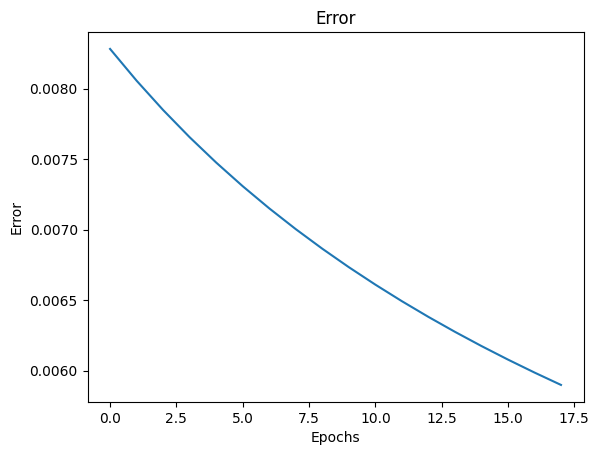

In [22]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### back propagation for AND problem

In [23]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

Epoch: 9999, Average error: 0.25546
Epoch: 19999, Average error: 0.02426
Epoch: 29999, Average error: 0.01404
Epoch: 39999, Average error: 0.01088
Epoch: 49999, Average error: 0.00921
Epoch: 59999, Average error: 0.00813
Epoch: 69999, Average error: 0.00736
Epoch: 79999, Average error: 0.00678
Epoch: 89999, Average error: 0.00632
Epoch: 99999, Average error: 0.00594
Epoch: 109999, Average error: 0.00563
Epoch: 119999, Average error: 0.00536
Epoch: 129999, Average error: 0.00512
Epoch: 139999, Average error: 0.00492
Epoch: 149999, Average error: 0.00474
Epoch: 159999, Average error: 0.00458
Epoch: 169999, Average error: 0.00443
Epoch: 179999, Average error: 0.00430

Final output after training: [[0.00550551 0.0016935  0.00169349 0.99171002]]
Ground truth [0 0 0 1]
Error after training: [[-0.00550553 -0.00169351 -0.00169349  0.00829   ]]
Average error: 0.00430


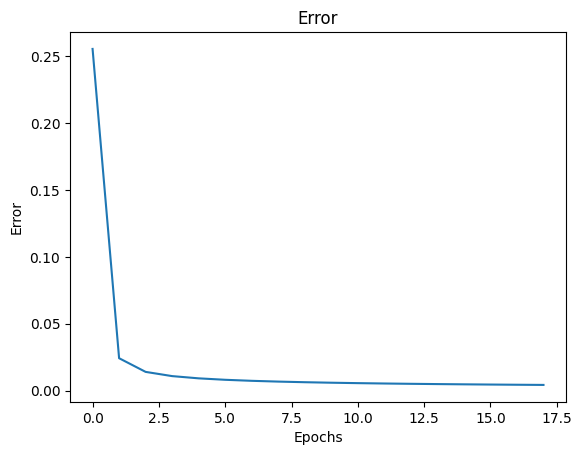

In [25]:
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += learningRate * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += learningRate * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += learningRate * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += learningRate * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### backpropagation for XOR problem

Epoch: 9999, Average error: 0.26535
Epoch: 19999, Average error: 0.26627
Epoch: 29999, Average error: 0.29973
Epoch: 39999, Average error: 0.05769
Epoch: 49999, Average error: 0.03865
Epoch: 59999, Average error: 0.03226
Epoch: 69999, Average error: 0.02873
Epoch: 79999, Average error: 0.02636
Epoch: 89999, Average error: 0.02459
Epoch: 99999, Average error: 0.02320
Epoch: 109999, Average error: 0.02204
Epoch: 119999, Average error: 0.02106
Epoch: 129999, Average error: 0.02022
Epoch: 139999, Average error: 0.01947
Epoch: 149999, Average error: 0.01880
Epoch: 159999, Average error: 0.01820
Epoch: 169999, Average error: 0.01766
Epoch: 179999, Average error: 0.01716
Epoch: 189999, Average error: 0.01671
Epoch: 199999, Average error: 0.01628
Epoch: 209999, Average error: 0.01589
Epoch: 219999, Average error: 0.01553
Epoch: 229999, Average error: 0.01519
Epoch: 239999, Average error: 0.01487
Epoch: 249999, Average error: 0.01457
Epoch: 259999, Average error: 0.01428
Epoch: 269999, Average 

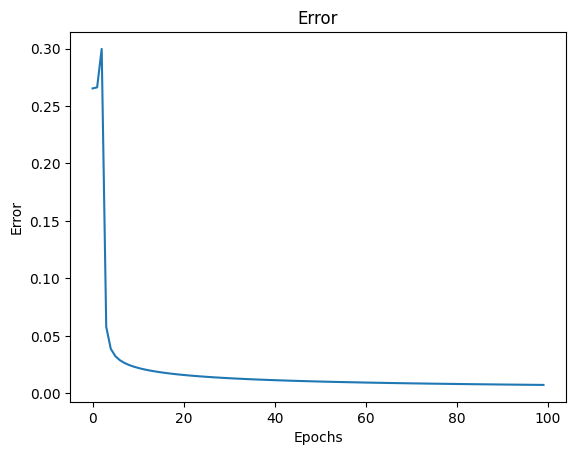

In [26]:
learningRate = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR


# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += learningRate * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += learningRate * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += learningRate * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += learningRate * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()